<a href="https://colab.research.google.com/github/t110318079/Vic_Detection/blob/main/IQA_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo for IQA-PyTorch


<a href="https://colab.research.google.com/drive/14J3KoyrjJ6R531DsdOy5Bza5xfeMODi6?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>
[![GitHub Stars](https://img.shields.io/github/stars/chaofengc/IQA-PyTorch?style=social)](https://github.com/chaofengc/IQA-PyTorch)
[![PyPI](https://img.shields.io/pypi/v/pyiqa)](https://pypi.org/project/pyiqa/)
![visitors](https://visitor-badge.laobi.icu/badge?page_id=chaofengc/IQA-PyTorch)

[Installation](#scrollTo=tcVxXhwr8yk0)

[Basic Usage](#scrollTo=UcOqHOJp9aZF)

>[Create metric function](#scrollTo=UcOqHOJp9aZF)

>[Test with paths as input](#scrollTo=1X5VA8xn_mAJ)

>[Test with tensor inputs](#scrollTo=t4VFP1SQBuy9)

>[Test with directory inputs (FID score)](#scrollTo=oN_sw_jdGTVk)

# Installation

In [1]:
!git clone https://github.com/chaofengc/IQA-PyTorch.git
%cd /content/IQA-PyTorch
!pip install -r requirements.txt
!python setup.py develop

Cloning into 'IQA-PyTorch'...
remote: Enumerating objects: 3571, done.
remote: Counting objects: 100% (1357/1357), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 3571 (delta 983), reused 1184 (delta 896), pack-reused 2214
Receiving objects: 100% (3571/3571), 25.91 MiB | 15.70 MiB/s, done.
Resolving deltas: 100% (2469/2469), done.
/content/IQA-PyTorch
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

# Basic Usage

### Create metric function

In [2]:
import pyiqa
import torch

# List available models
print(pyiqa.list_models())

['ahiq', 'brisque', 'ckdn', 'clipiqa', 'clipiqa+', 'clipiqa+_rn50_512', 'clipiqa+_vitL14_512', 'clipscore', 'cnniqa', 'cw_ssim', 'dbcnn', 'dists', 'entropy', 'fid', 'fsim', 'gmsd', 'hyperiqa', 'ilniqe', 'laion_aes', 'liqe', 'liqe_mix', 'lpips', 'lpips-vgg', 'mad', 'maniqa', 'maniqa-kadid', 'maniqa-koniq', 'maniqa-pipal', 'ms_ssim', 'musiq', 'musiq-ava', 'musiq-koniq', 'musiq-paq2piq', 'musiq-spaq', 'nima', 'nima-koniq', 'nima-spaq', 'nima-vgg16-ava', 'niqe', 'nlpd', 'nrqm', 'paq2piq', 'pi', 'pieapp', 'psnr', 'psnry', 'ssim', 'ssimc', 'stlpips', 'stlpips-vgg', 'topiq_fr', 'topiq_fr-pipal', 'topiq_iaa', 'topiq_iaa_res50', 'topiq_nr', 'topiq_nr-face', 'topiq_nr-flive', 'topiq_nr-spaq', 'tres', 'tres-flive', 'tres-koniq', 'uranker', 'vif', 'vsi', 'wadiqam_fr', 'wadiqam_nr']


In [3]:
# create metric function, for example lpips
lpips_metric = pyiqa.create_metric('lpips').cuda()
niqe_metric = pyiqa.create_metric('niqe').cuda()
fid_metric = pyiqa.create_metric('fid')

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 65.6MB/s]


Downloading: "https://github.com/chaofengc/IQA-Toolbox-Python/releases/download/v0.1-weights/LPIPS_v0.1_alex-df73285e.pth" to /root/.cache/torch/hub/checkpoints/LPIPS_v0.1_alex-df73285e.pth



100%|██████████| 5.87k/5.87k [00:00<00:00, 3.90MB/s]


Loading pretrained model LPIPS from /root/.cache/torch/hub/checkpoints/LPIPS_v0.1_alex-df73285e.pth
Downloading: "https://github.com/chaofengc/IQA-PyTorch/releases/download/v0.1-weights/niqe_modelparameters.mat" to /root/.cache/torch/hub/checkpoints/niqe_modelparameters.mat



100%|██████████| 8.15k/8.15k [00:00<00:00, 6.96MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth



100%|██████████| 91.2M/91.2M [00:00<00:00, 225MB/s]


Loading pretrained model Inception3 from /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth


### Test with paths as input

NIQE score: 4.68


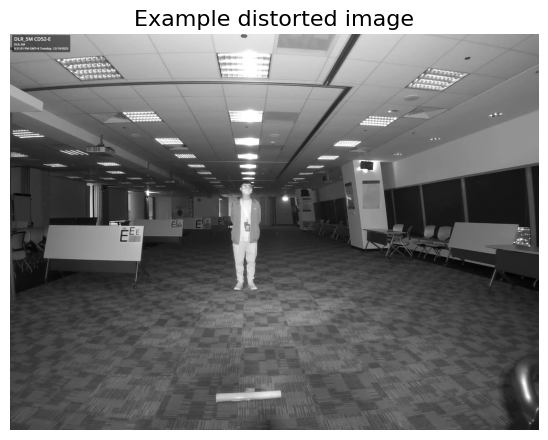

In [22]:
# Show example images
from PIL import Image
import matplotlib.pyplot as plt

imagepath='./ResultsCalibra/dist_dir/T6_OPS_T6_550mA_5m_st1_29_G25db_wide.jpg'

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
plt.title('Example distorted image', fontsize=16)
ax1.axis('off')
ax1.imshow(Image.open(imagepath))

#ax2 = fig.add_subplot(1, 2, 2)
#plt.title('Example reference image', fontsize=16)
#ax2.axis('off')
#ax2.imshow(Image.open('./ResultsCalibra/ref_dir/I03.bmp'))

# LPIPS takes two corresponding images: (distorted image, reference image)
#lpips_score = lpips_metric('./ResultsCalibra/dist_dir/I03.bmp', './ResultsCalibra/ref_dir/I03.bmp')
#print(f'LPIPS score: {lpips_score:.4f}')

# NIQE takes the distortion image
niqe_score = niqe_metric(imagepath)
print(f'NIQE score: {niqe_score:.2f}')

### Test with tensor inputs

In [ ]:
from pyiqa import imread2tensor

dist_img_tensor = imread2tensor('./ResultsCalibra/dist_dir/I03.bmp').unsqueeze(0).cuda()
ref_img_tensor = imread2tensor('./ResultsCalibra/ref_dir/I03.bmp').unsqueeze(0).cuda()

In [ ]:
lpips_score = lpips_metric(dist_img_tensor, ref_img_tensor)
print(f'LPIPS score: {lpips_score:.4f}')

niqe_score = niqe_metric(dist_img_tensor, ref_img_tensor)
print(f'NIQE score: {niqe_score:.4f}')

LPIPS score: 0.7237
NIQE score: 15.6538


### Test with directory inputs (FID score)

In [ ]:
# FID takes two directory inputs
fid_score = fid_metric('./ResultsCalibra/dist_dir/', './ResultsCalibra/ref_dir')
print(f'FID score: {fid_score:.4f}')

# We use clean-fid by default, you may also change to original fid by setting the `mode` parameter
legacy_fid_score = fid_metric('./ResultsCalibra/dist_dir/', './ResultsCalibra/ref_dir', mode='legacy_pytorch')
print(f'FID score: {legacy_fid_score:.4f}')


Found 5 images in the folder ./ResultsCalibra/dist_dir/


FID : 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Found 5 images in the folder ./ResultsCalibra/ref_dir


FID ref_dir: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


FID score: 220.5819
Found 5 images in the folder ./ResultsCalibra/dist_dir/


FID : 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Found 5 images in the folder ./ResultsCalibra/ref_dir


FID ref_dir: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


FID score: 225.3679
